# Image Dataset 測試

In [ ]:
import tensorflow as tf

In [ ]:
# 從網路取得壓縮檔，並解壓縮
untar_path = 'flower_photos'
flowers = tf.keras.utils.get_file(
    fname = untar_path,
    origin='https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz',
    extract=True)

In [54]:
flowers

'C:\\Users\\mikec\\.keras\\datasets\\flower_photos'

Found 3670 images belonging to 5 classes.


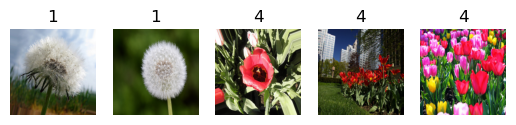

In [68]:
# 定義參數
BATCH_SIZE = 32 # 批量
IMG_DIM = 224   # 影像寬度
NB_CLASSES = 5  # label 類別數
flowers = flowers + '\\' + untar_path # 壓縮檔內含 flower_photos 資料夾

# 資料增補，rescale：圖片縮放， rotation_range：隨機旋轉20度以內
img_gen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255, rotation_range=20)

# 取一批檔案
images, labels = next(img_gen.flow_from_directory(flowers))

# 顯示圖片
import matplotlib.pyplot as plt
import numpy as np

for i in range(1, 6):
    plt.subplot(1, 5, i)
    plt.imshow(images[i])
    plt.title(np.argmax(labels[i]))
    plt.axis('off')

In [69]:
# 定義 generator 的屬性
gen = img_gen.flow_from_directory(
    flowers,
    (IMG_DIM, IMG_DIM),
    'rgb',
    class_mode='categorical',
    batch_size=BATCH_SIZE,
    shuffle=False
)

# 轉為 Dataset
ds = tf.data.Dataset.from_generator(lambda: gen,
    output_signature=(
         tf.TensorSpec(shape=(BATCH_SIZE, IMG_DIM, IMG_DIM, 3)),
         tf.TensorSpec(shape=(BATCH_SIZE, NB_CLASSES))
                     )
    )

Found 3670 images belonging to 5 classes.


(32, 224, 224, 3) (32, 5)


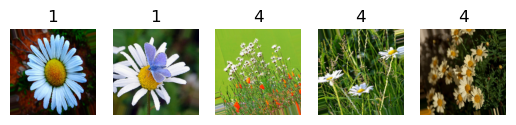

In [72]:
# 取一批資料
item = ds.take(1)
for element in item.as_numpy_iterator():
    images , label = element
    print(np.array(images).shape, np.array(label).shape)
    for i in range(1, 6):
        plt.subplot(1, 5, i)
        plt.imshow(images[i])
        plt.title(np.argmax(labels[i]))
        plt.axis('off')